In [1]:
%matplotlib inline
import matplotlib.mlab as mlab
import numpy as np
import matplotlib
import scipy
import scipy.special
import matplotlib.pyplot as plt
from matplotlib import rc
import os
from pylab import *
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.mplot3d import Axes3D

minorLocator1  = AutoMinorLocator()
minorLocator2   = AutoMinorLocator()


rcParams['figure.figsize'] = 10.5, 8
rcParams['xtick.major.pad'] = 10 
rcParams['ytick.major.pad'] = 10

/home/amit/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from scipy.special import legendre
import numpy as np

def firstpassage(tt,theta0):
    aa = [2*scipy.special.eval_legendre(2*n+1,cos(theta0))*scipy.special.gamma(n+3/2)*(-1)**n*(4*n+3)/(np.sqrt(np.pi)*scipy.special.gamma(n+1))*np.exp(-(2*n+1)*(2*n+2)*tt) for n in np.arange(100)]
    bb = [2*scipy.special.eval_legendre(2*n+1,cos(theta0))*(-1)**n*(4*n+3)*(np.sqrt(n)+3/(8*np.sqrt(n)))/(np.sqrt(np.pi))*np.exp(-(2*n+1)*(2*n+2)*tt) for n in np.arange(100,2000)]
    return np.sum(aa)+np.sum(bb)

def wald(tt,theta0):
    return (np.pi/2-theta0)/np.sqrt(4*np.pi*tt**3)*np.exp(-(np.pi/2-theta0)**2/(4*tt))


In [5]:
firstpassage(0.1,np.pi/4)

1.896356286534433

In [6]:
x = np.linspace(0.001,4,300)

z1 = [wald(t,0.0*np.pi/180.0) for t in x]
z2 = [wald(t,20.0*np.pi/180.0) for t in x]
z3 = [wald(t,45.0*np.pi/180.0) for t in x]


y1 = [firstpassage(t,0.0*np.pi/180.0) for t in x]
y2 = [firstpassage(t,20.0*np.pi/180.0) for t in x]
y3 = [firstpassage(t,45.0*np.pi/180.0) for t in x]

In [7]:
x = np.logspace(-5,1.5,300)
z1 = [wald(t,45.0*np.pi/180.0) for t in x]
z2 = [wald(t,60.0*np.pi/180.0) for t in x]
z3 = [wald(t,80.0*np.pi/180.0) for t in x]

y1 = [firstpassage(t,45.0*np.pi/180.0) for t in x]
y2 = [firstpassage(t,60.0*np.pi/180.0) for t in x]
y3 = [firstpassage(t,80.0*np.pi/180.0) for t in x]


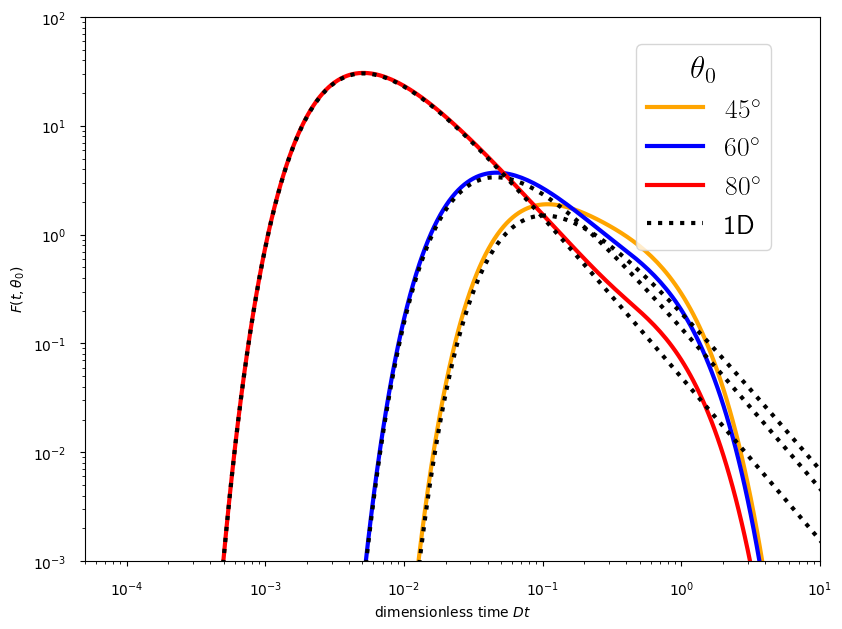

In [8]:
ax = plt.gca()

plt.plot(x,y1,ls='-',lw=3,color='Orange',label=r'$45^{\circ}$')
plt.plot(x,y2,ls='-',lw=3,color='Blue',label=r'$60^{\circ}$')
plt.plot(x,y3,ls='-',lw=3,color='Red',label=r'$80^{\circ}$')


plt.plot(x,z1,ls=':',lw=3,color='k',label=r'1D')
plt.plot(x,z2,ls=':',lw=3,color='k')
plt.plot(x,z3,ls=':',lw=3,color='k')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.5e-4,10])
ax.set_ylim([0.001,100])
plt.rc('text', usetex=True)
plt.rc('font', size=23)
ax.set_xlabel(r'dimensionless time $D t$',  linespacing=4)
ax.set_ylabel(r'$F(t,\theta_0)$',  linespacing=4)
legend = plt.legend(bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.,scatterpoints = 1, numpoints = 1, 
                    fontsize=20,title=r'$\theta_0$')
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.savefig('FPcomp.png', dpi=400)


In [9]:
firstpassage(0.1,np.pi/4)

1.896356286534433

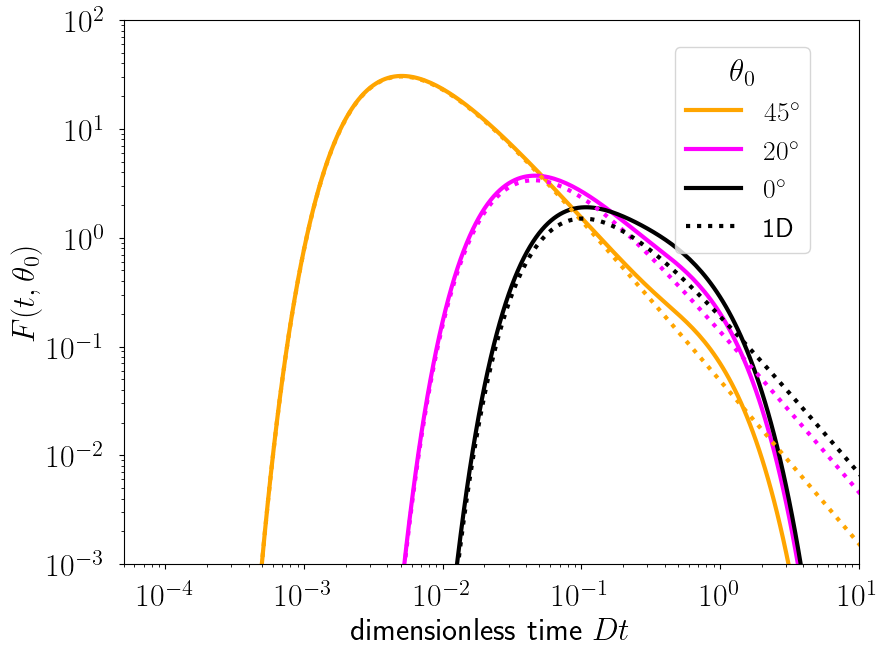

In [11]:
ax = plt.gca()

plt.plot(x,y3,ls='-',lw=3,color='Orange',label=r'$45^{\circ}$')
plt.plot(x,y2,ls='-',lw=3,color='Magenta',label=r'$20^{\circ}$')
plt.plot(x,y1,ls='-',lw=3,color='Black',label=r'$0^{\circ}$')



plt.plot(x,z3,ls=':',lw=3,color='Orange')
plt.plot(x,z2,ls=':',lw=3,color='Magenta')
plt.plot(x,z1,ls=':',lw=3,color='Black',label=r'1D')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.5e-4,10])
ax.set_ylim([0.001,100])
plt.rc('text', usetex=True)
plt.rc('font', size=23)
ax.set_xlabel(r'dimensionless time $D t$',  linespacing=4)
ax.set_ylabel(r'$F(t,\theta_0)$',  linespacing=4)
legend = plt.legend(bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.,scatterpoints = 1, numpoints = 1, 
                    fontsize=20,title=r'$\theta_0$')
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.savefig('FPcomp2.png', dpi=400)
